#### 笋图

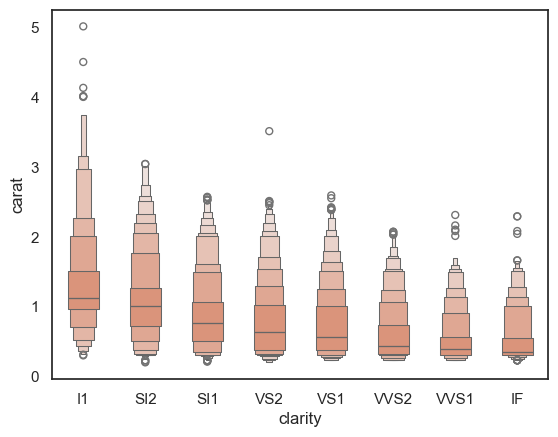

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
diamonds = pd.read_csv('diamonds.csv')
sns.set(style = 'white',palette = 'flare')
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.boxenplot(data = diamonds,x='clarity',y='carat',orient='v',width=.5,order=clarity_ranking,width_method='linear')
plt.show()

#### JoinGrid 热力图效果

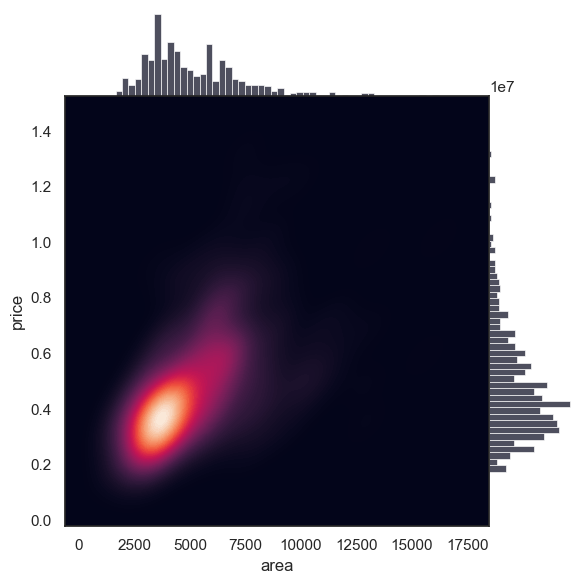

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="white")

df = pd.read_csv("house_price.csv")

g = sns.JointGrid(data=df, x="area", y="price", space=0)
g.plot_joint(sns.kdeplot,fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=0.7, bins=50)

#### 升级版关系图

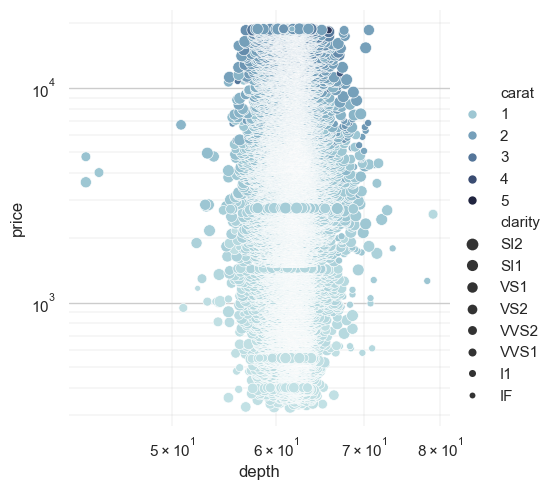

In [22]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example planets dataset
diamonds = pd.read_csv("diamonds.csv")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=diamonds,
    x="depth", y="price",
    hue="carat", size="clarity",
    palette=cmap
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25) # "minor" 指定了要设置的是次要网格线，若要设置主要网格线可使用 "major"
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

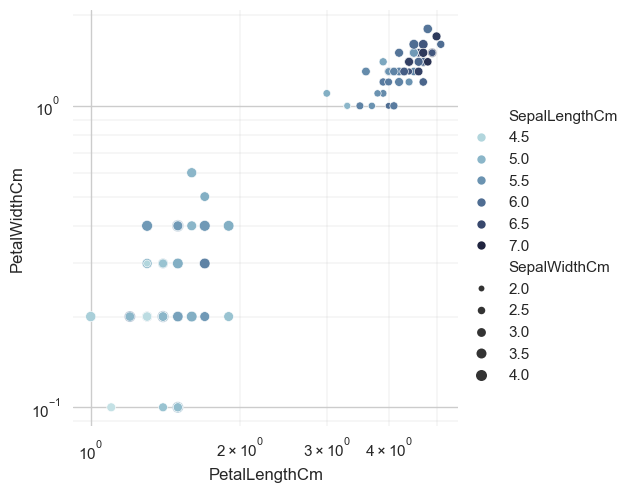

In [44]:
iris = pd.read_csv('Iris.csv')
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

m = sns.relplot(data = iris,x = 'PetalLengthCm',y = 'PetalWidthCm',hue = 'SepalLengthCm',size = 'SepalWidthCm',palette = cmap)
m.set(xscale="log", yscale="log")
m.ax.xaxis.grid(True, "minor", linewidth=.25) # "minor" 指定了要设置的是次要网格线，若要设置主要网格线可使用 "major"
m.ax.yaxis.grid(True, "minor", linewidth=.25)
m.despine(left=True, bottom=True)
plt.show()

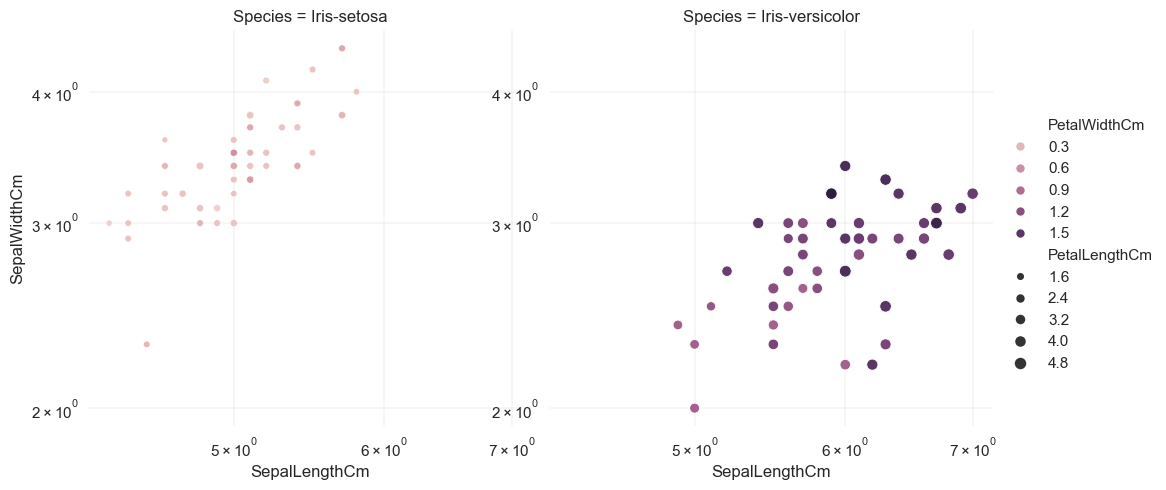

In [74]:
# 解决上一讲的问题,这应该是iris关系对比图的最终形态
iris = pd.read_csv('Iris.csv')
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

m = sns.relplot(data = iris,
            x = iris['SepalLengthCm'],
            y = iris['SepalWidthCm'],
            hue = iris['PetalWidthCm'],
            size = iris['PetalLengthCm'],
            col = iris['Species'],col_wrap=2,
            kind='scatter', markers='+')

# 在使用 seaborn 的 relplot 绘图时出现 AttributeError: 'numpy.ndarray' object has no attribute 'xaxis' 错误，通常是因为 relplot 返回的是一个 FacetGrid 对象，其 axes 属性是一个二维的 numpy.ndarray，而直接对这个数组调用 xaxis 属性会导致错误。需要遍历这个数组中的每个 Axes 对象，再对每个 Axes 对象进行操作。

# 遍历每个 Axes 对象
for ax in m.axes.flat:
    # 设置对数坐标轴
    ax.set(xscale="log", yscale="log")
    # 设置坐标轴次要网格线
    ax.xaxis.grid(True, "minor", linewidth=.25)
    ax.yaxis.grid(True, "minor", linewidth=.25)
    # 去除边框
    sns.despine(ax=ax, left=True, bottom=True)
plt.show()

##### 关系热力图

In [180]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('house_price.csv')
data = pd.get_dummies(data,drop_first = True,
                     columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],
                     dtype = int)

In [181]:
# “df.columns” 是 Pandas 库中用于操作数据框（DataFrame）的一个属性，它可以输出数据框现有的列名，方便后续复制使用。
data.columns = data.columns.map("".join)
data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [182]:
corr_s = data.corr().stack()
corr_s

price                         price                              1.000000
                              area                               0.535997
                              bedrooms                           0.366494
                              bathrooms                          0.517545
                              stories                            0.420712
                                                                   ...   
furnishingstatus_unfurnished  hotwaterheating_yes               -0.059194
                              airconditioning_yes               -0.094086
                              prefarea_yes                      -0.081271
                              furnishingstatus_semi-furnished   -0.588405
                              furnishingstatus_unfurnished       1.000000
Length: 196, dtype: float64

In [183]:
corr_matrix = corr_s.reset_index(name = 'correlation')
corr_matrix 

,level_0,level_1,correlation
0,price,price,1.000000
1,price,area,0.535997
2,price,bedrooms,0.366494
3,price,bathrooms,0.517545
4,price,stories,0.420712
...,...,...,...
191,furnishingstatus_unfurnished,hotwaterheating_yes,-0.059194
192,furnishingstatus_unfurnished,airconditioning_yes,-0.094086
193,furnishingstatus_unfurnished,prefarea_yes,-0.081271
194,furnishingstatus_unfurnished,furnishingstatus_semi-furnished,-0.588405


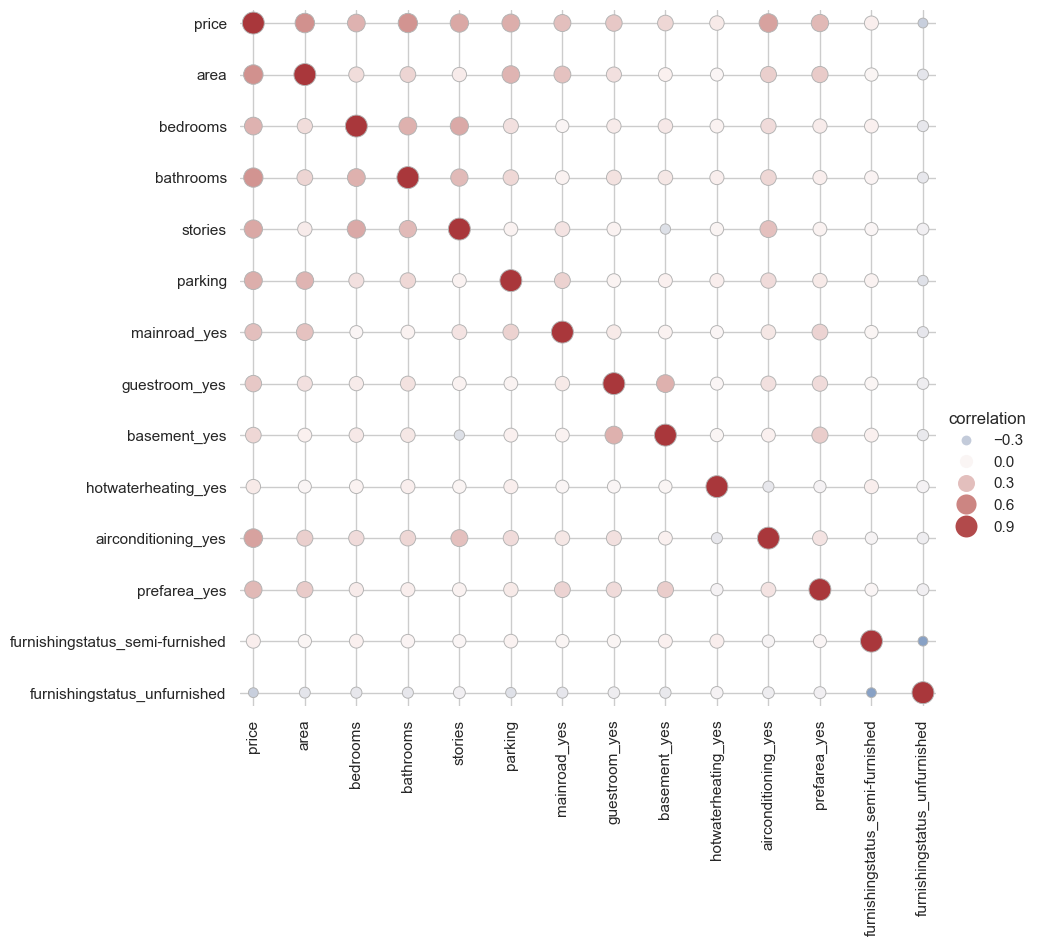

In [184]:
g = sns.relplot(
    data=corr_matrix,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legend_handles:
    artist.set_markeredgecolor(".7")

#### 分布图 displot

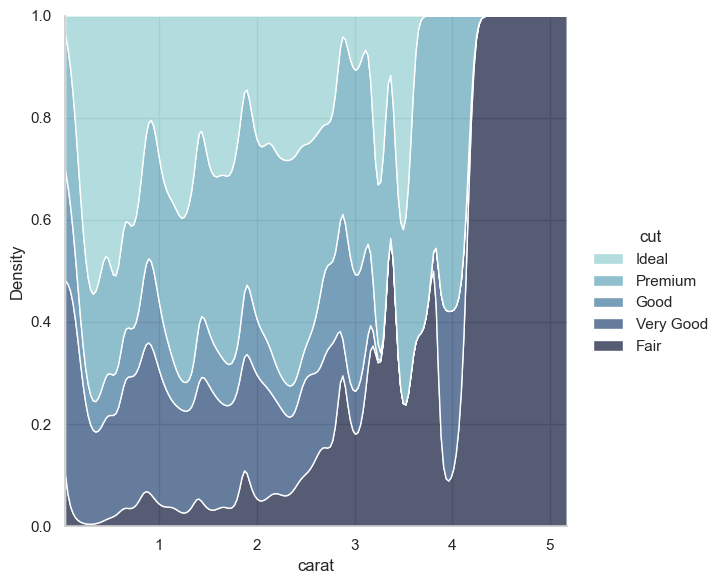

In [79]:
import seaborn as sns
sns.set_theme(style="whitegrid")
diamonds = pd.read_csv("diamonds.csv")

sns.displot(data = diamonds,x = 'carat', # 因为是统计频率,所以不需要y
            kind = 'kde',
            height = 6, # height：指定每个子图的高度（以英寸为单位），这里设置为 6。
            clip = (0, None), # 指定绘图数据的取值范围，这里 (0, None) 表示 x 轴数据从 0 开始，上限不做限制。
            hue = 'cut', multiple = 'fill', # 当使用 hue 参数进行分组时，指定如何展示多个分布。'fill' 表示将多个分布堆叠并填充到整个区域。
            palette="ch:rot=-.25,hue=1,light=.75"
           )

plt.show()

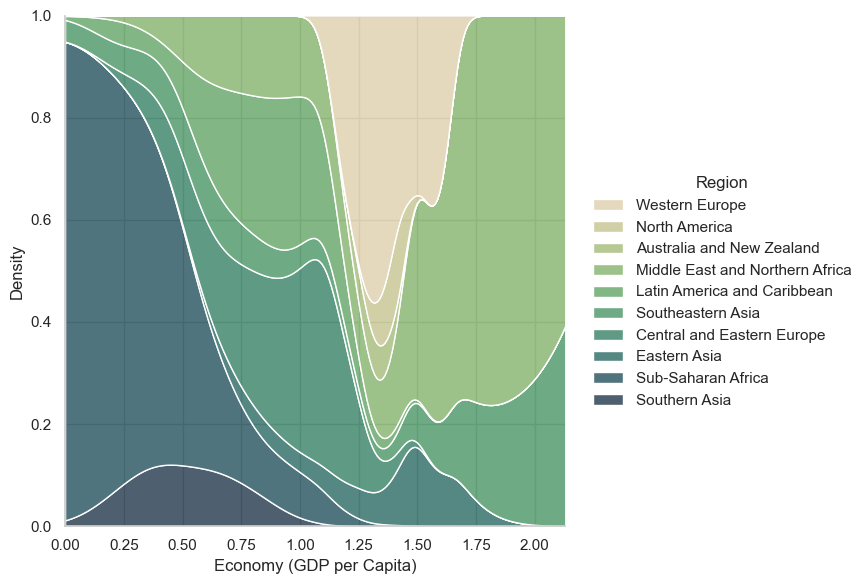

In [89]:
import seaborn as sns
sns.set_theme(style="whitegrid")
happiness = pd.read_csv("2015.csv")

sns.displot(data = happiness,x = 'Economy (GDP per Capita)', # x需要是数值数据
            kind = 'kde',
            height = 6, 
            clip = (0, None), 
            hue = 'Region', multiple = 'fill', # hue需要是分类数据或者较少的数值数据
            palette="ch:rot=-.7,hue=1,light=.8"
           )

plt.show()

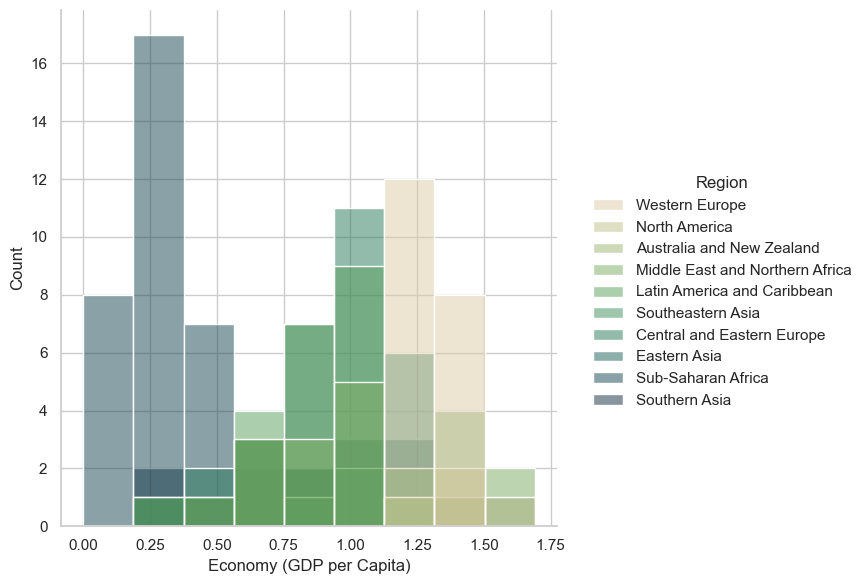

In [95]:
import seaborn as sns
sns.set_theme(style="whitegrid")
happiness = pd.read_csv("2015.csv")

sns.displot(data = happiness,x = 'Economy (GDP per Capita)', # x需要是数值数据
            kind = 'hist',
            height = 6, 
            hue = 'Region',  # hue需要是分类数据或者较少的数值数据
            palette="ch:rot=-.7,hue=1,light=.8"
           )

plt.show()

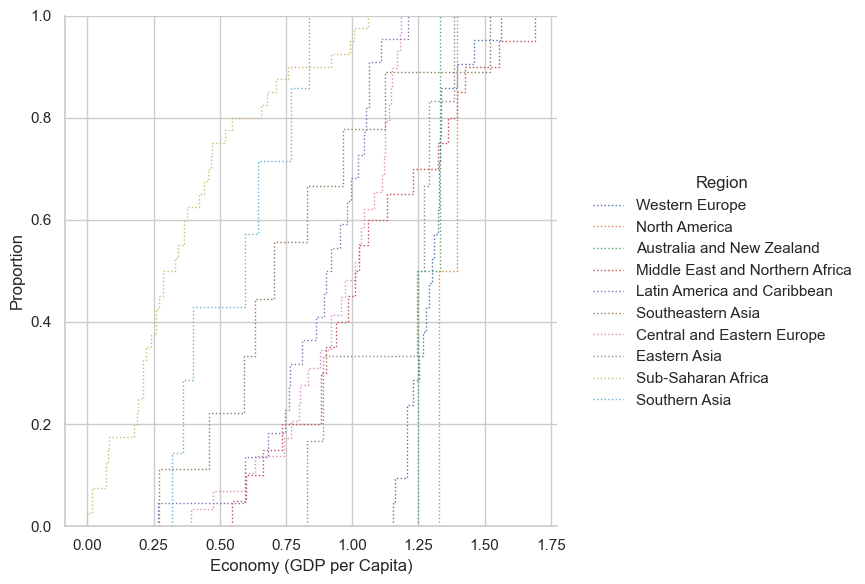

In [105]:
import seaborn as sns
sns.set_theme(style="whitegrid")
happiness = pd.read_csv("2015.csv")
sns.diverging_palette(120,240, s=75, l=50, sep=10, n=6, center='light', as_cmap=False)
sns.displot(data = happiness,x = 'Economy (GDP per Capita)', # x需要是数值数据
            kind = 'ecdf',
            height = 6, 
            hue = 'Region', 
            linestyle = ':',linewidth = 1,

           )

plt.show()

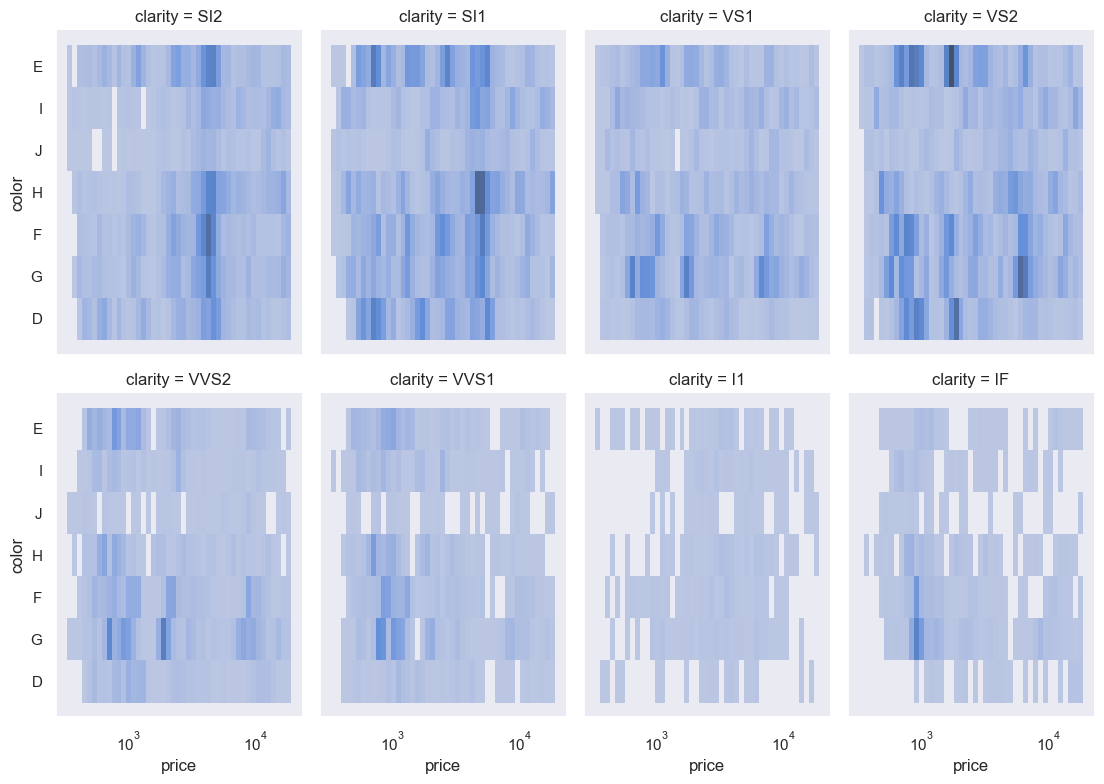

In [91]:
import seaborn as sns
sns.set_theme(style="dark")

diamonds = pd.read_csv("diamonds.csv")
sns.displot(
    data=diamonds, x="price", y="color", col="clarity",
    log_scale=(True, False), 
    # log_scale：指定是否对坐标轴进行对数变换，(True, False) 表示对 x 轴（price）进行对数变换，对 y 轴（color）不进行对数变换。对数变换可以帮助更好地展示数据的分布，特别是当数据的取值范围较大时。
    col_wrap=4, height=4, aspect=.7
    # height：指定每个子图的高度（以英寸为单位），这里设置为 4。
    # aspect：指定每个子图的宽高比，这里设置为 0.7。宽高比会影响子图的形状。
)

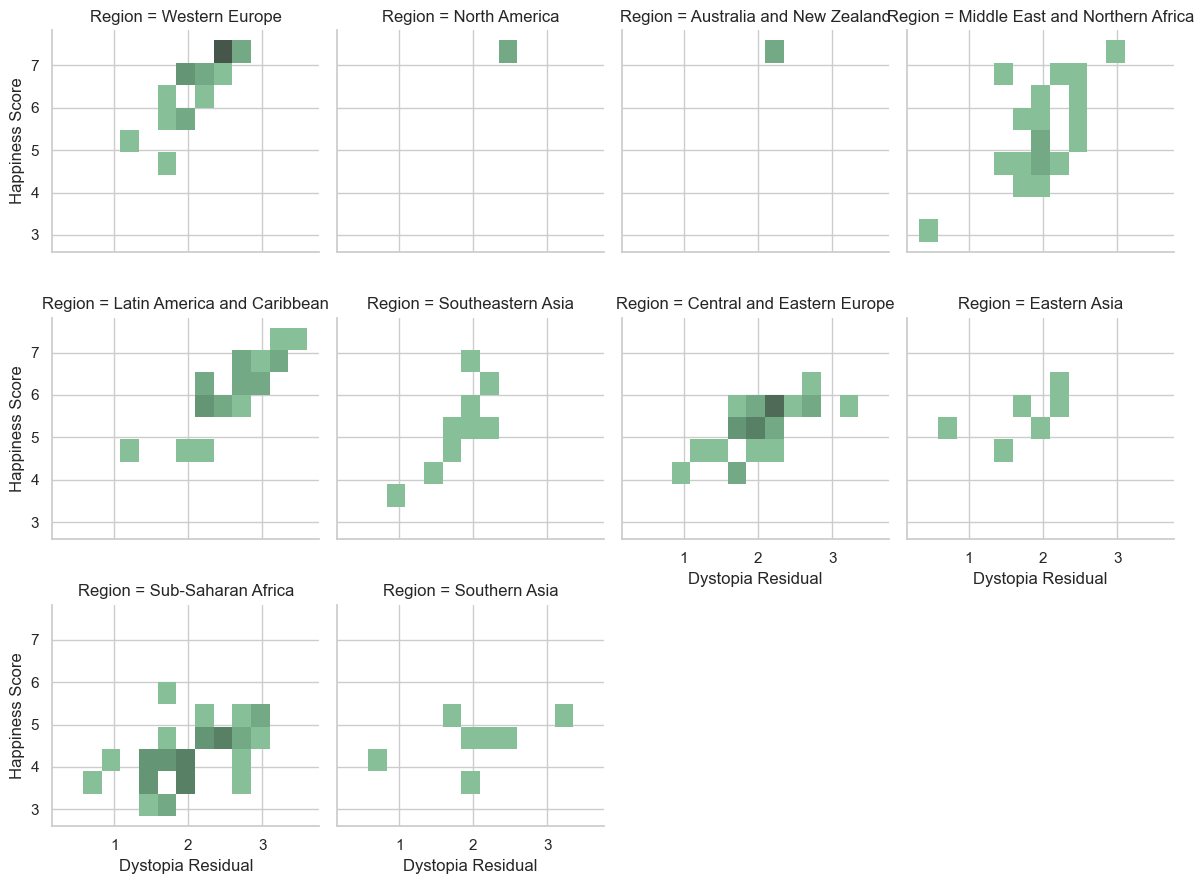

In [116]:
import seaborn as sns
sns.set_theme(style="whitegrid",palette='crest')

happiness = pd.read_csv("2015.csv")
sns.displot(
    data=happiness, x="Dystopia Residual", y="Happiness Score", col="Region",
    log_scale=(False, False), 
    col_wrap=4, height=3, aspect=1,
)
plt.show()

#### 复合图像

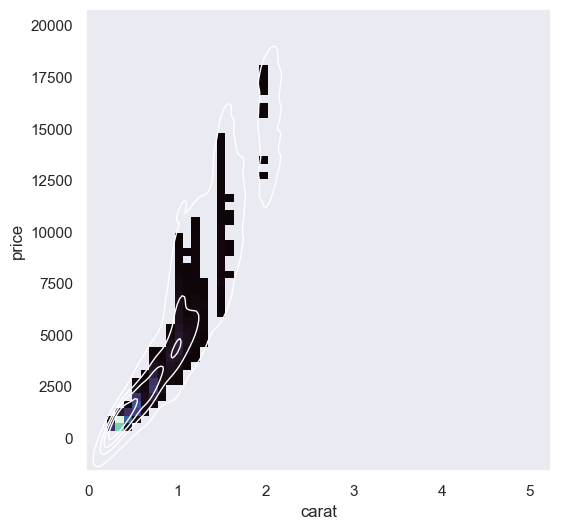

In [125]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

diamonds = pd.read_csv('diamonds.csv')

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
#sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=diamonds['carat'], y=diamonds['price'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=diamonds['carat'], y=diamonds['price'], levels=5, color="w", linewidths=1)

plt.show()

<Axes: >

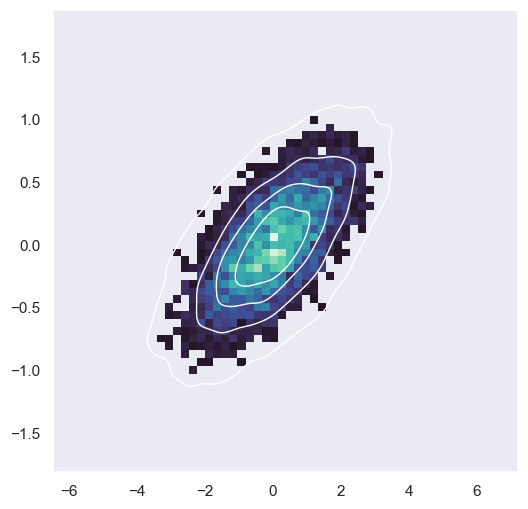

In [128]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000 # n: 数据集中的样本数，这里设置为 10000。
mean = [0, 0] # mean: 一个长度为 2 的数组，表示多元正态分布的均值向量，这里设置为 [0, 0]。
cov = [(2, .4), (.4, .2)] # cov: 一个 2x2 的二维数组，表示多元正态分布的协方差矩阵。这里设置了一个对角线元素为 2 和 0.2 的协方差矩阵，即 [(2, .4), (.4, .2)]。
rng = np.random.RandomState(0) # np.random.RandomState() 生成了一个二维的多元正态分布数据集，并且取得了其转置。
x, y = rng.multivariate_normal(mean, cov, n).T
# rng.multivariate_normal(mean, cov, n) 生成了一个包含 10000 个样本的二维多元正态分布数据集。
# multivariate_normal() 方法用于生成多元正态分布的随机数。
# 其中，mean 参数表示均值向量，cov 参数表示协方差矩阵，n 参数表示生成的样本数。
# 返回的数据集是一个包含 n 行和 2 列的数组，其中每一行代表一个二维样本点。
#  .T 对数据集进行转置，将每一列变为每一行，得到两个一维数组 x 和 y
# x 表示第一列数据，y 表示第二列数据，它们分别对应于多元正态分布的两个维度。
# 这样，生成了一个具有指定均值和协方差的二维多元正态分布数据集，
# 并将其分别存储在 x 和 y 两个一维数组中.

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
#sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

<Axes: >

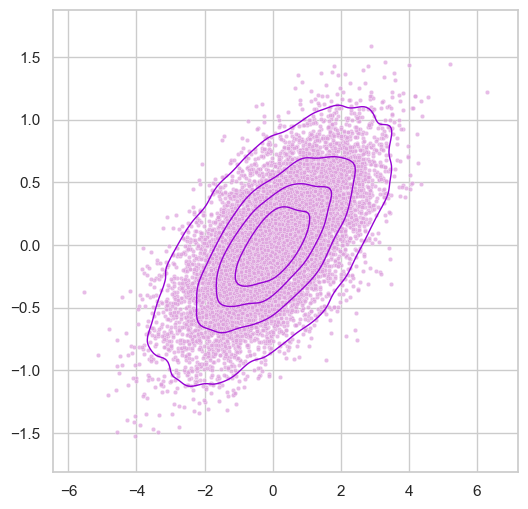

In [133]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Simulate data from a bivariate Gaussian
n = 10000 # n: 数据集中的样本数，这里设置为 10000。
mean = [0, 0] # mean: 一个长度为 2 的数组，表示多元正态分布的均值向量，这里设置为 [0, 0]。
cov = [(2, .4), (.4, .2)] # cov: 一个 2x2 的二维数组，表示多元正态分布的协方差矩阵。这里设置了一个对角线元素为 2 和 0.2 的协方差矩阵，即 [(2, .4), (.4, .2)]。
rng = np.random.RandomState(0) # np.random.RandomState() 生成了一个二维的多元正态分布数据集，并且取得了其转置。
x, y = rng.multivariate_normal(mean, cov, n).T
# rng.multivariate_normal(mean, cov, n) 生成了一个包含 10000 个样本的二维多元正态分布数据集。
# multivariate_normal() 方法用于生成多元正态分布的随机数。
# 其中，mean 参数表示均值向量，cov 参数表示协方差矩阵，n 参数表示生成的样本数。
# 返回的数据集是一个包含 n 行和 2 列的数组，其中每一行代表一个二维样本点。
#  .T 对数据集进行转置，将每一列变为每一行，得到两个一维数组 x 和 y
# x 表示第一列数据，y 表示第二列数据，它们分别对应于多元正态分布的两个维度。
# 这样，生成了一个具有指定均值和协方差的二维多元正态分布数据集，
# 并将其分别存储在 x 和 y 两个一维数组中.

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=10, color="plum",alpha = 0.7)
sns.kdeplot(x=x, y=y, levels=5, color="darkviolet", linewidths=1)

#### 三角热力图

In [143]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
data = pd.read_csv('house_price.csv')

In [145]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [146]:
data = pd.get_dummies(data,drop_first = True,
                     columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],
                     dtype = int)
data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [147]:
corr = data.corr()
corr

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


In [148]:
data_matrix = np.ones_like(corr, dtype=bool)
data_matrix

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         

In [149]:
mask = np.triu(data_matrix)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

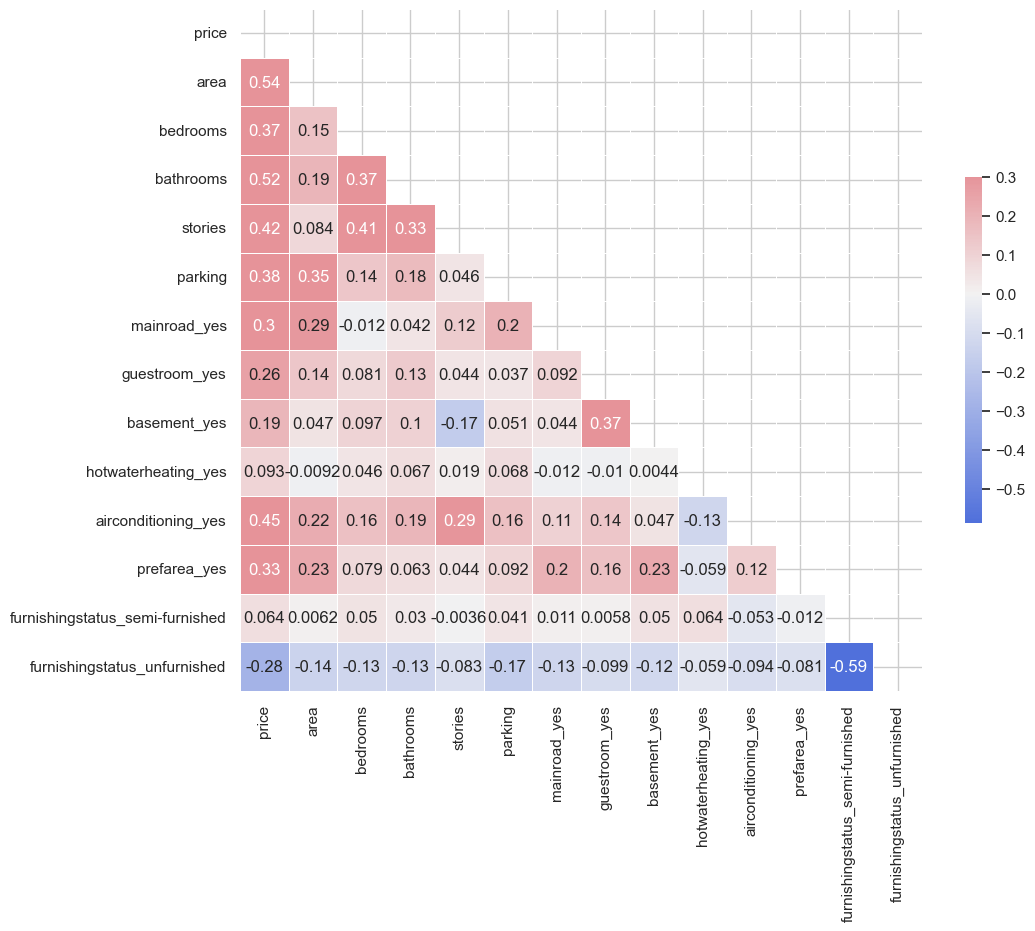

In [164]:
figure,ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)
plt.show()

In [165]:
# 尝试另一种方法
mask_ = np.tril(data_matrix)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

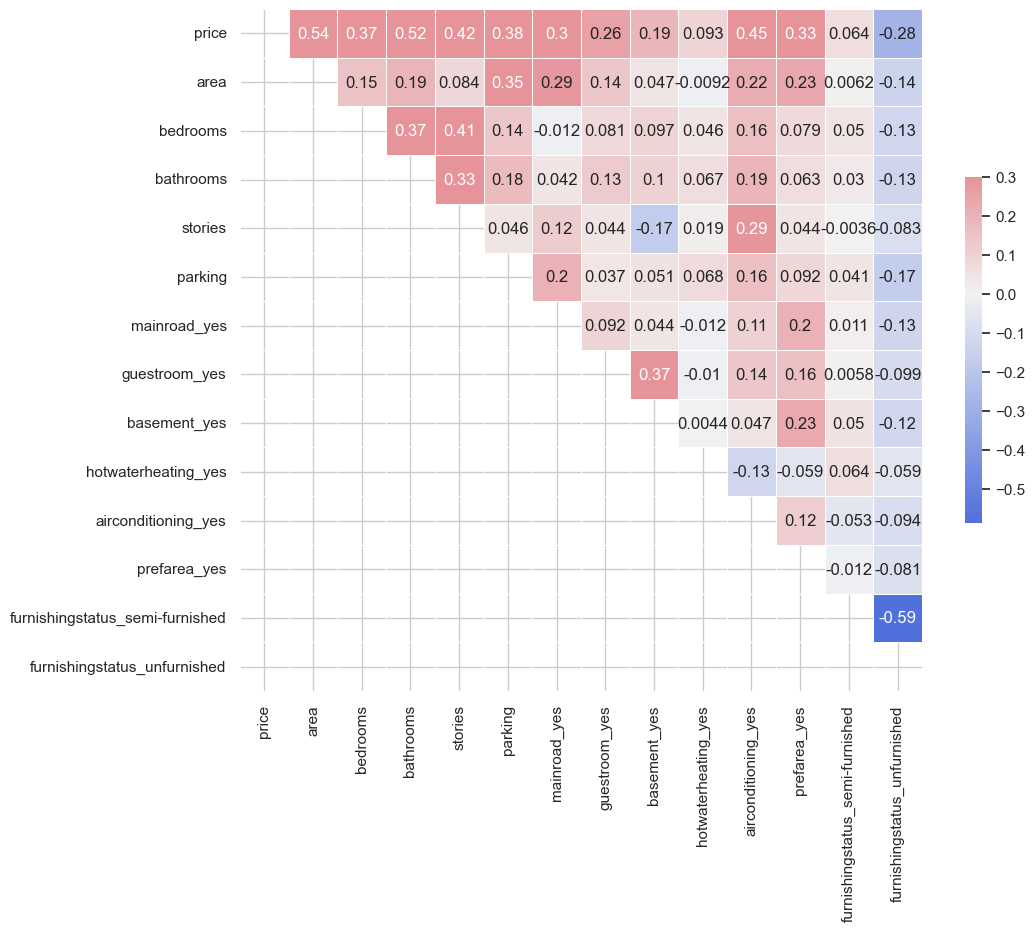

In [167]:
figure,ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(corr, mask=mask_, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)
plt.show()

#### 核函数组成的山脉图

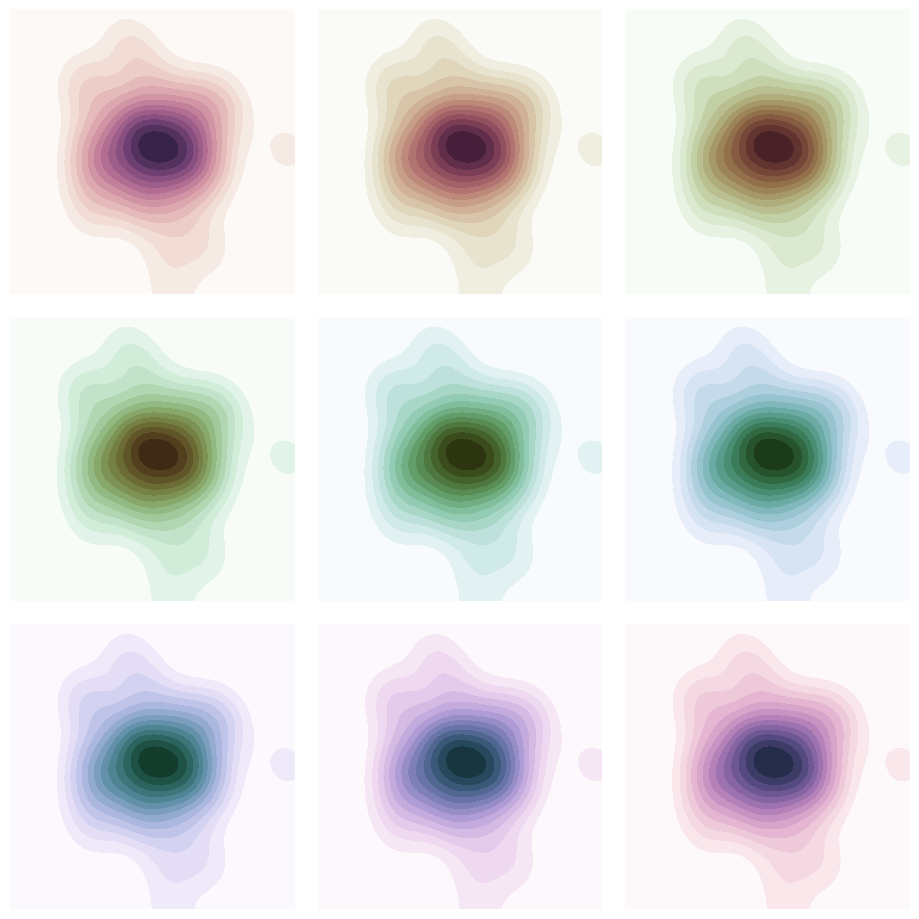

In [187]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

for ax, s in zip(axes.flat, np.linspace(0, 3, 10)): 
    # np.linspace 这个函数的作用是生成一个从 0 到 3（包含 0 和 3）的等差数列，总共有 10 个元素。
    
    # axes 通常是一个二维的 Axes 对象数组，axes.flat 是将这个二维数组展平为一维迭代器，这样可以依次访问 axes 中的每个 Axes 对象。
    # zip(axes.flat, np.linspace(0, 3, 10)) 是将 axes.flat 和 np.linspace(0, 3, 10) 这两个可迭代对象进行配对，形成一个新的迭代器。
    # 每次迭代时，会从 axes.flat 中取出一个 Axes 对象，从 np.linspace(0, 3, 10) 中取出一个数值，分别赋值给变量 ax 和 s。
    
    rs = np.random.RandomState(50)
    # np.random.RandomState(50) 用于创建一个随机数生成器对象，其中 50 是随机数种子。
    # 随机数种子的作用是使得随机数生成过程可重复，即每次使用相同的种子创建的随机数生成器，在调用相同的随机数生成方法时，会生成相同的随机数序列2。
    x, y = rs.normal(size=(2, 50))
    # normal() 方法是一种生成正态分布（高斯分布）随机数的方法，它可以接受多个参数，用于控制生成的随机数的均值和标准差。
    # rs.normal(size=(2, 50)) 生成了 2 个维度为 50 的随机数数组 x 和 y，这两个数组是从正态分布中生成的随机数。
    # size=(2, 50) 表示生成的随机数数组是一个 2 行 50 列的数组，其中第一行是 x 数组，第二行是 y 数组。随机数的均值默认为 0，标准差默认为 1。

    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)
    # 生成色盘
    
    sns.kdeplot(
        x=x, y=y,
        cmap=cmap, fill=True, # fill=True：表示对核密度图进行填充，使图形更直观地展示数据的分布密度。
        clip=(-5, 5),  # clip=(-5, 5)：对数据进行裁剪，只考虑在区间 (-5, 5) 内的数据。超出该区间的数据将被忽略。
        cut=10, # cut=10：控制核密度估计的范围。cut 值越大，估计的范围越宽，会包含更多远离数据集中区域的部分。
        thresh=0, # thresh=0：指定绘制轮廓线的阈值。只有密度值大于该阈值的区域才会被绘制。
        levels=15, # levels=15：指定绘制的轮廓线数量。更多的轮廓线可以更详细地展示数据的密度变化。
        ax=ax,
    )
    ax.set_axis_off()

ax.set(xlim=(-3.5, 3.5), ylim=(-3.5, 3.5))
f.subplots_adjust(0, 0, 1, 1, .08, .08)
# f.subplots_adjust() 是 Matplotlib 中 Figure 对象的一个方法，用于调整子图的布局参数。
#该方法接受多个参数，分别是 left、bottom、right、top、wspace 和 hspace。
# left=0 表示子图的左边距为 0，bottom=0 表示子图的下边距为 0，
# right=1 表示子图的右边距为 0（即占据整个宽度），top=1 表示子图的上边距为 0（即占据整个高度），
# wspace=0.08 表示子图之间的水平间距为 0.08，hspace=0.08 表示子图之间的垂直间距为 0.08。
# 这些参数的取值范围是 [0, 1]，表示相对于图形宽度和高度的比例3。

#### 适用于分析随着时间变化的事物

In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# rc 参数允许用户通过字典的形式对 Matplotlib 的默认参数进行覆盖。
# axes.facecolor 控制坐标轴区域的背景颜色，这里设置为 (0, 0, 0, 0)，表示完全透明的黑色，即坐标轴区域没有背景颜色。

# Create the data
rs = np.random.RandomState(1979)
# 1979个随机数

x = rs.randn(500)
# rs 通常是 numpy 库中 RandomState 类的一个实例，它用于生成可重复的随机数序列。
# randn 是 RandomState 类的一个方法，用于生成服从标准正态分布（均值为 0，标准差为 1）的随机数。
# (500) 表示要生成 500 个这样的随机数，最终这些随机数会被存储在变量 x 中

g = np.tile(list("ABCDEFGHIJ"), 50)
# 代码 g = np.tile(list("ABCDEFGHIJ"), 50) 中，np.tile 是 numpy 库中的一个函数，用于重复数组或序列。
# list("ABCDEFGHIJ") 会将字符串 "ABCDEFGHIJ" 转换为一个包含单个字符的列表 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']。
# np.tile(list("ABCDEFGHIJ"), 50) 则表示将这个列表重复 50 次。最终，将重复 50 次后的结果存储在变量 g 中。

df = pd.DataFrame(dict(x=x, g=g))
df

,x,g
0,-0.961877,A
1,0.147050,B
2,-0.629989,C
3,0.791019,D
4,1.583534,E
...,...,...
495,-0.641978,F
496,1.212877,G
497,-1.525753,H
498,0.251022,I


In [195]:
m = df.g.map(ord)
m

0      65
1      66
2      67
3      68
4      69
       ..
495    70
496    71
497    72
498    73
499    74
Name: g, Length: 500, dtype: int64

In [196]:
df["x"] += m
df

,x,g
0,64.038123,A
1,66.147050,B
2,66.370011,C
3,68.791019,D
4,70.583534,E
...,...,...
495,69.358022,F
496,72.212877,G
497,70.474247,H
498,73.251022,I


/opt/anaconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.13/site-packa

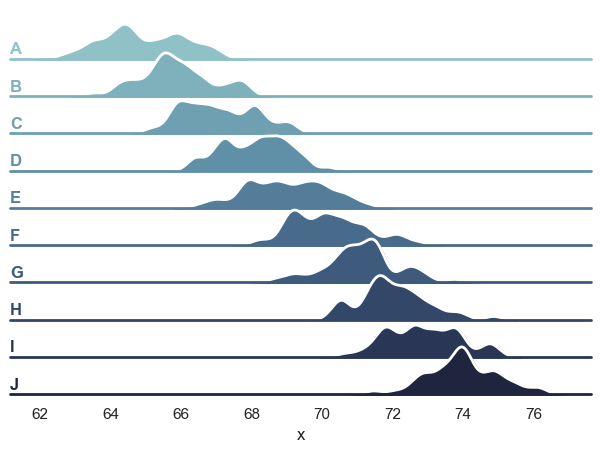

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# rc 参数允许用户通过字典的形式对 Matplotlib 的默认参数进行覆盖。
# axes.facecolor 控制坐标轴区域的背景颜色，这里设置为 (0, 0, 0, 0)，表示完全透明的黑色，即坐标轴区域没有背景颜色。

# Create the data
rs = np.random.RandomState(1979)
# 1979个随机数

x = rs.randn(500) # 这一步搭建了重要的数据结构:正态分布
# rs 通常是 numpy 库中 RandomState 类的一个实例，它用于生成可重复的随机数序列。
# randn 是 RandomState 类的一个方法，用于生成服从标准正态分布（均值为 0，标准差为 1）的随机数。
# (500) 表示要生成 500 个这样的随机数，最终这些随机数会被存储在变量 x 中

g = np.tile(list("ABCDEFGHIJ"), 50)
# 代码 g = np.tile(list("ABCDEFGHIJ"), 50) 中，np.tile 是 numpy 库中的一个函数，用于重复数组或序列。
# list("ABCDEFGHIJ") 会将字符串 "ABCDEFGHIJ" 转换为一个包含单个字符的列表 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']。
# np.tile(list("ABCDEFGHIJ"), 50) 则表示将这个列表重复 50 次。最终，将重复 50 次后的结果存储在变量 g 中。

df = pd.DataFrame(dict(x=x, g=g))
# df = pd.DataFrame(dict(x=x, g=g)) 这行代码是使用 pandas 库创建一个 DataFrame 对象。
# dict(x=x, g=g) 是一个字典，其中键 x 和 g 分别对应的值为变量 x 和 g。
# 这行代码的作用是将 x 和 g 这两个数组组合成一个 DataFrame，DataFrame 类似于表格，其中有两列，列名分别为 x 和 g，每一行对应 x 和 g 中相同索引位置的元素。

m = df.g.map(ord) # 数值递增
# 在这段代码中，df 是一个 pandas 的 DataFrame 对象，它是通过 pd.DataFrame(dict(x=x, g=g)) 创建的。
# df.g 表示选取 DataFrame 中名为 g 的列，该列的数据类型为字符串类型，因为 g 是由字符 A 到 J 循环重复组成的数组。
# map() 是 pandas 中 Series 对象的一个方法，它的作用是对 Series 中的每个元素应用一个指定的函数。
# 这里指定的函数是 ord()，ord() 是 Python 内置函数，用于返回一个字符的 Unicode 编码值。
# 因此，df.g.map(ord) 会对 df 中 g 列的每个字符元素应用 ord() 函数，将每个字符转换为其对应的 Unicode 编码值，
# 并返回一个新的 Series 对象，最后将这个新的 Series 对象赋值给变量 m。

df["x"] += m # 数值递增

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)
# FacetGrid 是 Seaborn 中用于创建多面板图（Facet Plot）的类，可以将数据集按照一个或多个变量的取值分成多个子集，并在不同的小图中分别进行可视化。
# aspect=15：控制每个子图的纵横比。aspect 乘以 height 得到子图的宽度。这里 aspect 为 15，表示子图的宽度是高度的 15 倍。
# map() 方法是 FacetGrid 对象的一个重要方法，它允许您在每个小图中绘制特定类型的图形。
# map() 方法会将数据集中的每个子集（每个小图）传递给指定的绘图函数 func 进行处理。
# 您可以在 map() 方法中使用 Seaborn 中的绘图函数（如 sns.scatterplot()、sns.lineplot()、sns.histplot() 等），也可以自定义绘图函数来实现更灵活的绘图效果。

# 以上数据结构的精妙之处在于,在一个正态分布的数据中每隔10个抽出来,所以图像每行都有数据的偏移,也有正态分布的属性

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5) # 传入函数
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5) # 传入函数
# 在 sns.kdeplot 函数中，clip_on=False 是一个绘图参数，它主要用于控制绘图元素是否被限制在坐标轴范围内。
# 当 clip_on 设置为 True（默认值）时，绘图元素（如核密度估计曲线）会被裁剪到坐标轴的边界内，即超出坐标轴范围的部分将不会显示。
# 而当 clip_on 设置为 False 时，绘图元素可以超出坐标轴的边界显示。

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# refline() 方法用于在每个小图中添加参考线。参考线是指在图形中绘制一条水平或垂直线，用于标记某个特定的数值或位置。
# FacetGrid.refline(y=None, x=None, **kwargs)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25) # 垂直方向子图之间的距离

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)